### Imports

In [1]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

### TASK 1
1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram

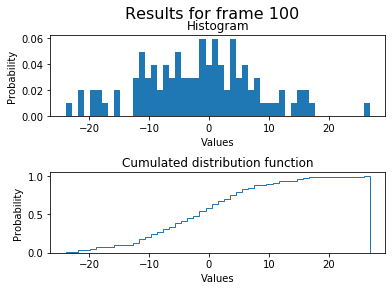

In [4]:
BINS=50;
FRAMES=100;
INTERVAL=100;

def customDistribution():
    return pyro.sample("custom_categorical", pyro.distributions.Categorical(probs = torch.tensor([0.1,0.9])))

def normalDistribution():
    mean = 0
    variance = 10
    return pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))

def nextSample():
#     return customDistribution()
    return normalDistribution()

def animate():
    samples = []
    
    fig, (ax1, ax2) = plt.subplots(2)
    
    fig.subplots_adjust(hspace=0.7)
    
    def setTitles(num):
        fig.suptitle(f'Results for frame {num+1}', fontsize=16)
        ax1.set_title('Histogram')
        ax1.set_xlabel('Values')
        ax1.set_ylabel('Probability')
        ax2.set_title('Cumulated distribution function')
        ax2.set_xlabel('Values')
        ax2.set_ylabel('Probability')
    

    def update_functions(num, samples):
        samples+=[nextSample()]
        ax1.cla()
        ax2.cla()
        setTitles(num)
        ax1.hist(samples, density=True, bins=BINS)
        ax2.hist(samples, density=True, histtype='step',
                           cumulative=True, bins=BINS) 
    def init():
        return

    anim = animation.FuncAnimation(fig, update_functions, init_func=init, frames=FRAMES,interval=INTERVAL, fargs=(samples, ) )
    
    return HTML(anim.to_jshtml())

animate()

### TASK 2
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation

Loading 10%
Loading 20%
Loading 30%
Loading 40%
Loading 50%
Loading 60%
Loading 70%
Loading 80%
Loading 90%
Loading 100%


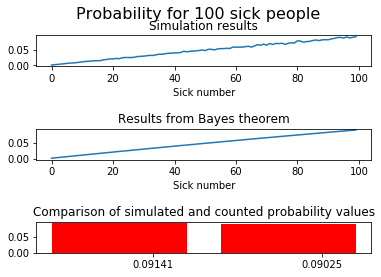

In [5]:
# The parameter is number of sick people in the population
#constants
MAX_SICK_COUNT=100
POPULATION=50000
P_NEGATIVE_SICK=0.01 #probability of negative test given that person was sick
P_POSITIVE_HEALTHY=0.02
#simulation parameters
INTERVAL=100


#SIMULATION
def simulation(sick_count):

    p_sick=sick_count/POPULATION
    p_healthy=1-p_sick
    p_positive_sick=1-P_NEGATIVE_SICK
    
    def getSampleFromPopulation(i):
#         return pyro.sample("categorical_sampling_from_population", pyro.distributions.Categorical(probs = torch.tensor([p_sick,p_healthy])))
        return 0 if i<sick_count else 1

    def performTestForSample(sample):
        if sample==0:#sick
            return pyro.sample("categorical_sampling_sick_case", pyro.distributions.Categorical(probs = torch.tensor([p_positive_sick,P_NEGATIVE_SICK])))
        else:#healthy
            return pyro.sample("categorical_sampling_healthy_case", pyro.distributions.Categorical(probs = torch.tensor([P_POSITIVE_HEALTHY,1-P_POSITIVE_HEALTHY])))

    def estimateTest(sample,testResult,positive_counter,positive_sick_counter):
        if sample==0 and testResult==0:
            positive_counter+=1
            positive_sick_counter+=1
        if sample==1 and testResult==0:
            positive_counter+=1
        return positive_counter,positive_sick_counter
    
    def countFinalProbability(positive_counter,positive_sick_counter):
        return positive_sick_counter/positive_counter
    
    def performSimulation():
        sick_counter=0;
        positive_counter=0;
        positive_sick_counter=0;
        for i in range(POPULATION):
            sample=getSampleFromPopulation(i)
            if sample==0:
                sick_counter+=1;
            testResult=performTestForSample(sample)
            positive_counter,positive_sick_counter=estimateTest(sample,testResult,positive_counter,positive_sick_counter)
        return countFinalProbability(positive_counter,positive_sick_counter)

#COUNTED FROM BAYES THEOREM
    def countFromBayesTheorm():
        p_positive=p_sick*p_positive_sick+p_healthy*P_POSITIVE_HEALTHY
        p_sick_positive=(p_positive_sick*p_sick)/p_positive
        return p_sick_positive
    
    return performSimulation(),countFromBayesTheorm()

#ANIMATION
def animate():
    simulation_samples = []
    counted_samples = []
    
    fig, (ax1, ax2,ax3) = plt.subplots(3)
    fig.subplots_adjust(hspace=2)
    
    def setTitles(num,sim,cnt):
        fig.suptitle(f'Probability for {num+1} sick people', fontsize=16)
        ax1.set_title('Simulation results')
        ax1.set_xlabel('Sick number')
        ax2.set_title('Results from Bayes theorem')
        ax2.set_xlabel('Sick number')
        ax3.set_title('Comparison of simulated and counted probability values')
        ax3.set_xticks(np.arange(2) + 0.2)
        ax3.set_xticklabels(("%.5f" %sim,"%.5f" %cnt ))
        

    def update_functions(num, sim_samples,cnt_samples):
        if(num%10==0):
            print(f'Loading {num+10}%')
        simulated,counted=simulation(num+1)
        sim_samples+=[simulated]
        cnt_samples+=[counted]
        ax1.cla()
        ax2.cla()
        ax3.cla()
        setTitles(num,simulated,counted)
        ax1.plot(sim_samples)
        ax2.plot(cnt_samples)
        ax3.bar([0,1],[simulated,counted],color='r')
    
    def init():
        return

    anim = animation.FuncAnimation(fig, update_functions, init_func=init, frames=MAX_SICK_COUNT,interval=INTERVAL, fargs=(simulation_samples,counted_samples) )
    
    return HTML(anim.to_jshtml())

animate()

### TASK 3
 Visualize (pmf, mean, variance) of pseudo random number generators (parametrized) that follows distributions:

    - Single gaussian 
    - Two combined gaussian distributions 
    - N combined gaussian distributions 

Single gaussian distribution:
MEAN:30.966135025024414; STD:5.992307662963867; VARIANCE:35.907752990722656


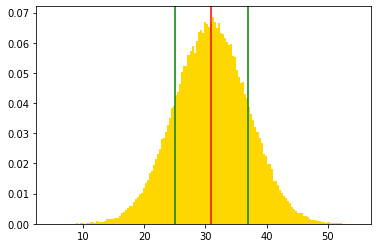

In [6]:
SAMPLES_NUMBER=100000;
MAX_GENERATOR_STD=10;
MAX_GENERATOR_MEAN=100;
BINS_COUNT=150


def prepare_normal_samples(mean, standard_dev, samples_count):
    m = pyro.distributions.Normal(mean,standard_dev)
    samples=[m.sample() for i in range(samples_count)]
    return samples

def generate_samples_from_random_distribution():
    random_mean=np.random.randint(MAX_GENERATOR_MEAN)
    random_std=np.random.randint(MAX_GENERATOR_STD)
    return prepare_normal_samples(random_mean,random_std,SAMPLES_NUMBER)

def visualize_plots(samples):
    plt.hist(samples, density=True,color='gold', bins=BINS_COUNT)
    mean=np.mean(samples)
    std=np.std(samples)
    variance=std*std
    print(f'MEAN:{mean}; STD:{std}; VARIANCE:{variance}')
    plt.axvline(color='r',x=mean)
    plt.axvline(color='g',x=mean-std)
    plt.axvline(color='g',x=mean+std)
    return

def visualize_single():
    print('Single gaussian distribution:')
    samples=generate_samples_from_random_distribution()
    visualize_plots(samples)
    
def visualize_two_combined():
    print('Double gaussian distribution:')
    samples=generate_samples_from_random_distribution()+generate_samples_from_random_distribution()
    visualize_plots(samples)
    
def visualize_N_combined_distributions(count):
    samples=[]
    for i in range(count):
        samples+=generate_samples_from_random_distribution()
    visualize_plots(samples)
    
visualize_single()

Double gaussian distribution:
MEAN:45.50599670410156; STD:45.06148910522461; VARIANCE:2030.537841796875


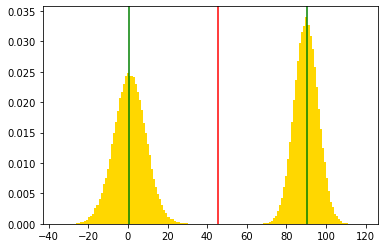

In [7]:
visualize_two_combined()

MEAN:70.75670623779297; STD:11.798852920532227; VARIANCE:139.2129364013672


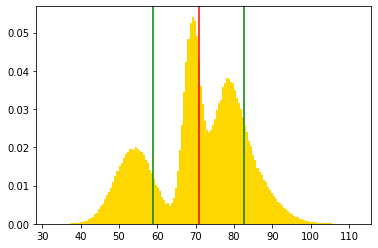

In [8]:
visualize_N_combined_distributions(4)

### TASK 4
Student applied for 9 faculties, acceptance chance for each faculty was 0.01. Unfortunately student was not accepted to any. What is the probability of that situation? Write a function that will solve that problem (parametrized), use exact method and binomials based solution with parameterized number of trials (binomial)

Probability for 9 facuties with 0.01 approval chance
Counted: 0.9135172474836409
From experiment: 0.9145


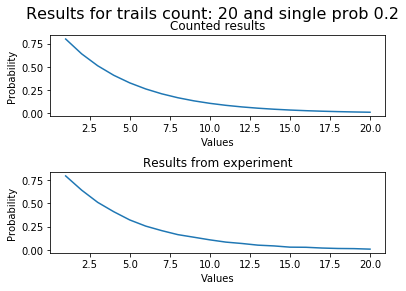

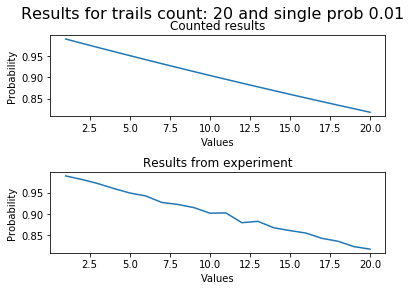

In [9]:
SINGLE_SUCCESS_PROBABILITY=0.01
AVERAGE_COUNT=10000;

#COUNTED
#n= number of trails, p probability of single success
def counted_proability_of_failure(n,p):
    
    #k successes in n trails with p prob of one success
    def binomial_prob(k,n,p):
        def factorial(n):
            return np.prod(range(1,n+1))
        def newton_symbol(a,b):
            return factorial(a)/(factorial(b)*factorial(a-b))
        return newton_symbol(n,k)*np.power(p,k)*np.power(1-p,n-k)

    #probability of at least one success in n trails with prob of single success p
    def acceptance_proability(n,p):
        prob_sum=0;
        for i in range(n):
           prob_sum+=binomial_prob(i+1,n,p)
        return prob_sum;
    return 1-acceptance_proability(n,p)

#FROM EXPERIMENT
#n= number of trails, p probability of single success
def failure_probability_binomial(n,p):
    
    def getSuccessesCount():
        m = pyro.distributions.Binomial(1, torch.Tensor(n*[p]))
        tensor=m.sample()
        return(np.sum(tensor.numpy()))
    
    def countProbability():
        accepted_count=0;
        for i in range(AVERAGE_COUNT):
            num=getSuccessesCount()
            if num>0:
                accepted_count+=1
        return accepted_count/AVERAGE_COUNT
    
    return 1-countProbability()


def animate(single_success_probability):
    x_axis=[]
    counted_samples = []
    trail_samples=[]
    
    fig, (ax1, ax2) = plt.subplots(2)
    
    fig.subplots_adjust(hspace=0.7)
    
    def setTitles(num):
        fig.suptitle(f'Results for trails count: {num+1} and single prob {single_success_probability}', fontsize=16)
        ax1.set_title('Counted results')
        ax1.set_xlabel('Values')
        ax1.set_ylabel('Probability')
        ax2.set_title('Results from experiment')
        ax2.set_xlabel('Values')
        ax2.set_ylabel('Probability')
    

    def update_functions(num, counted_samples,trail_samples,x_axis):
        x_axis+=[num+1]
        counted_samples+=[counted_proability_of_failure(num+1,single_success_probability)]
        trail_samples+=[failure_probability_binomial(num+1,single_success_probability)]
        ax1.cla()
        ax2.cla()
        setTitles(num)
        ax1.plot(x_axis,counted_samples) 
        ax2.plot(x_axis,trail_samples)

    def init():
        return

    anim = animation.FuncAnimation(fig, update_functions, init_func=init, frames=20,interval=100, fargs=(counted_samples,trail_samples,x_axis ) )
    
    return HTML(anim.to_jshtml())
   
animate(0.2)

print('Probability for 9 facuties with 0.01 approval chance')
print(f'Counted: {counted_proability_of_failure(9,SINGLE_SUCCESS_PROBABILITY)}')
print(f'From experiment: {failure_probability_binomial(9,SINGLE_SUCCESS_PROBABILITY)}')

animate(SINGLE_SUCCESS_PROBABILITY)

### TASK 5
Create simple pyro model, that models salary distribution in population of Poland.

 Requirements:

 - two distributions
 - one of distribution can result in more than 2 results (not Bernoulli)
 
A priori parameters derived from 2016 cenus carried out by GUS (Central Statistical Office in Poland)

In [10]:
FEMALE_ON_POLISH_MARKET=6889 #in thousands
MALE_ON_POLISH_MARKET=8860 #in thousands
MINIMAL_WAGE=1850 
AVERAGE_WAGE_MEN=3697
STD_WAGE_MAN=900 #no real data provided 
AVERAGE_WAGE_WOMEN=3349
STD_WAGE_WOMEN=1100 # no real data provided


def wage():
    def male_probability():
        return MALE_ON_POLISH_MARKET/(FEMALE_ON_POLISH_MARKET+MALE_ON_POLISH_MARKET)
    def create_avg_dictionary():
        return {'male':AVERAGE_WAGE_MEN,'female':AVERAGE_WAGE_WOMEN}
    def create_stds_dictionary():
        return {'male':STD_WAGE_MAN,'female':STD_WAGE_WOMEN}
    def simulate():
        male = pyro.sample('male', pyro.distributions.Bernoulli(male_probability()))
        male = 'male' if male.item() == 1.0 else 'female'
        mean,std=create_avg_dictionary()[male],create_stds_dictionary()[male]
        wage = pyro.sample('wage', pyro.distributions.Normal(mean, std)).item()
        wage= MINIMAL_WAGE if wage<MINIMAL_WAGE else wage
        return male,wage
    return simulate()

for i in range(10):
    print(wage())

('female', 1997.876708984375)
('male', 4733.1396484375)
('female', 4096.52978515625)
('male', 4995.56298828125)
('male', 3416.8359375)
('male', 2423.797119140625)
('female', 4412.9375)
('male', 3988.95166015625)
('female', 4069.16650390625)
('male', 3391.734375)
